#Deniz Özdemirli - 190503029

##Imports

In [ ]:
import seaborn as sns
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##Dataset

In [ ]:
df = joblib.load('dfo.joblib')

In [ ]:
df

,mjd,year,idn,lat,lon,rho,area,carea,carl,nss
0,35091.28,1954.954191,21,34.0,82.0,0.58,146.0,104.0,56.0,8
1,35094.25,1954.962328,22,24.5,337.5,0.94,8.0,11.0,11.0,1
2,35100.26,1954.978794,23,35.0,336.5,0.61,30.0,19.0,19.0,1
3,35105.20,1954.992328,24,-24.0,251.5,0.39,36.0,20.0,20.0,1
4,35111.33,1955.009123,1,20.5,128.0,0.86,58.0,57.0,28.0,5
...,...,...,...,...,...,...,...,...,...,...
19562,55557.28,2010.987068,124,12.0,320.0,0.26,82.0,43.0,16.0,9
19563,55559.39,2010.992849,125,-25.7,233.5,0.86,20.0,20.0,15.0,2
19564,55561.31,2010.998109,125,-27.3,234.4,0.63,8.0,5.0,3.0,2
19565,55561.31,2010.998109,126,34.7,266.9,0.61,102.0,64.0,38.0,5


##Plots

### iki satırlı, üç sütunlu grafik panelleri

*   0,0 paneli: x: lon, y: lat olacak şekilde nokta grafik çizin
*   0,1 paneli: x: year, y: lon -- scatterplot
*   0,2 paneli: x: year, y: lat -- scatterplot

*   1,0 paneli: histogram of latitudes, latitude distribution
*   1,1 paneli: sunspot-group area distribution (df.carea)
*   1,2 paneli: x: time, y: carea



Text(457.0073529411765, 0.5, 'Area')

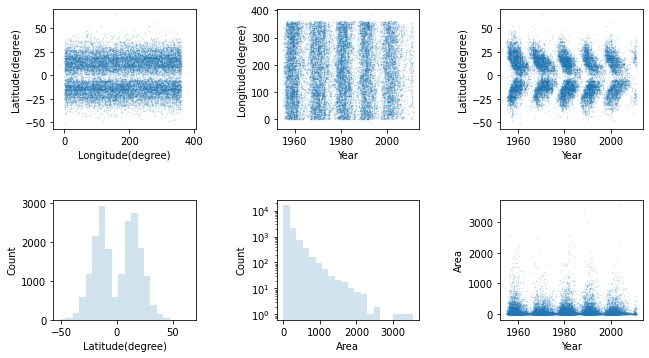

In [ ]:
# alpha , s önemli
# alpha=0.3 sets the transparency of the overlaid plot.
# alpha	: The plot fill opacity (from 0 to 1)
# s : size of the points

# eksene isim ver birimi vermeyi unutma,sınavda puan gider
# year,degree,area gibi

fig, axes = plt.subplots(2,3,figsize=(10,6)) 
fig.tight_layout(pad=5.0) #spacing between plots

axes[0,0].scatter(df.lon,df.lat,alpha = 0.2,s=.2)
axes[0,0].set_xlabel("Longitude(degree)") #x label
axes[0,0].set_ylabel("Latitude(degree)") #y label

axes[0,1].scatter(df.year,df.lon,alpha = 0.2,s=.2)
axes[0,1].set_xlabel("Year") #x label
axes[0,1].set_ylabel("Longitude(degree)") #y label

axes[0,2].scatter(df.year,df.lat,alpha = 0.2,s=.2)
axes[0,2].set_xlabel("Year") #x label
axes[0,2].set_ylabel("Latitude(degree)") #y label

axes[1,0].hist(df.lat,20,alpha = 0.2)
axes[1,0].set_xlabel("Latitude(degree)") #x label
axes[1,0].set_ylabel("Count") #y label

axes[1,1].hist(df.carea,20,log=True,alpha = 0.2) #exponensiyel azalış, o yüzden log = 10
axes[1,1].set_xlabel("Area") #x label
axes[1,1].set_ylabel("Count") #y label

axes[1,2].scatter(df.year,df.carea,alpha = 0.2,s=.2)
axes[1,2].set_xlabel("Year") #x label
axes[1,2].set_ylabel("Area") #y label

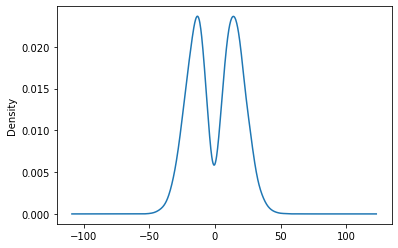

In [ ]:
df['lat'].plot.density() #histogramın çizgi hali

### (8,10) figür seaborn scatterplot
y ekseninde yıl
x ekseninde longitude
sns.scatter(data=df,x = 'lon',y='year)

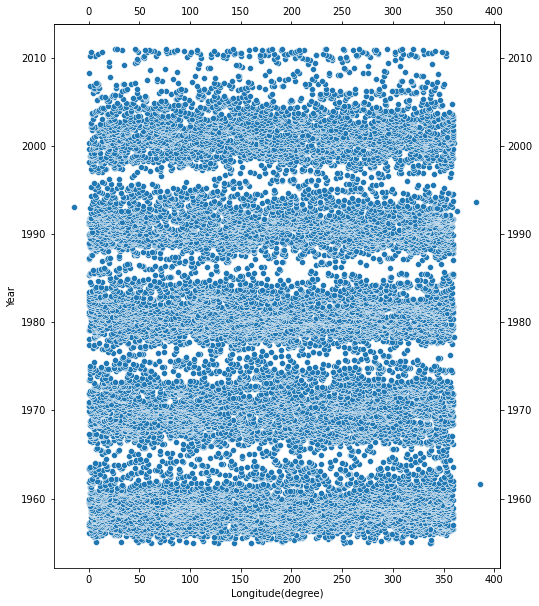

In [ ]:
fig = plt.figure(figsize = (8,10))
p = sns.scatterplot(data=df,x = 'lon',y='year')
p.set_xlabel("Longitude(degree)") #x label
p.set_ylabel("Year") #y label

#sağa üste eksen ile sayıları ekleme
secax = plt.gca().secondary_xaxis('top')
secay = plt.gca().secondary_yaxis('right')

Text(0, 0.5, 'Year (<1962)')

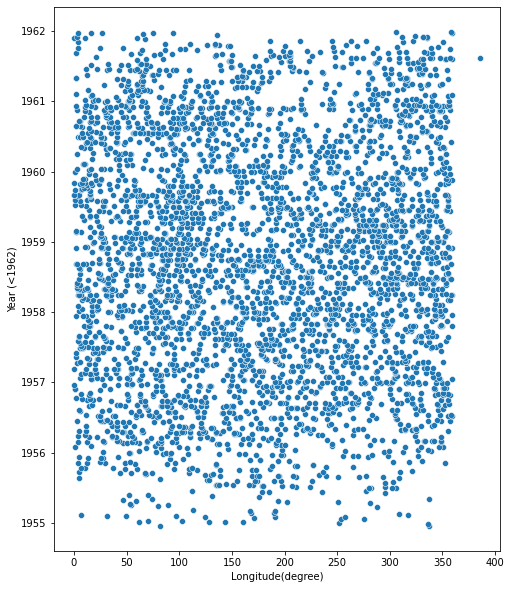

In [ ]:
fig = plt.figure(figsize = (8,10))
p = sns.scatterplot(data=df[df.year < 1962],x = 'lon',y='year')
p.set_xlabel("Longitude(degree)") #x label
p.set_ylabel("Year (<1962)") #y label

Text(0, 0.5, 'Year (<1962)')

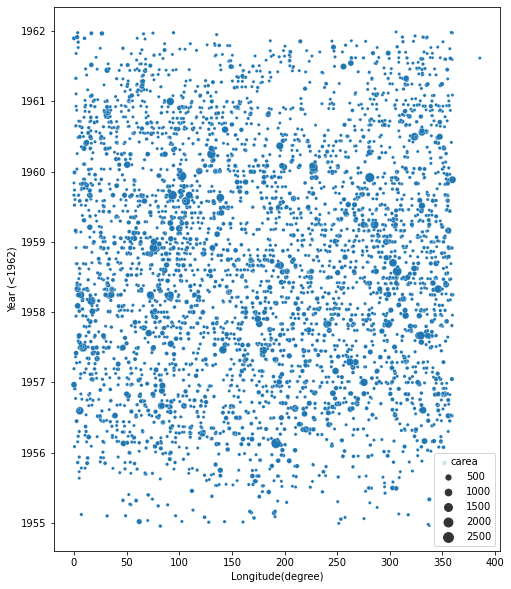

In [ ]:
fig = plt.figure(figsize = (8,10))
p = sns.scatterplot(data=df[df.year < 1962],x = 'lon',y='year',size= 'carea',sizes = (10,100))
p.set_xlabel("Longitude(degree)") #x label
p.set_ylabel("Year (<1962)") #y label

Text(0, 0.5, 'Year (<1962)')

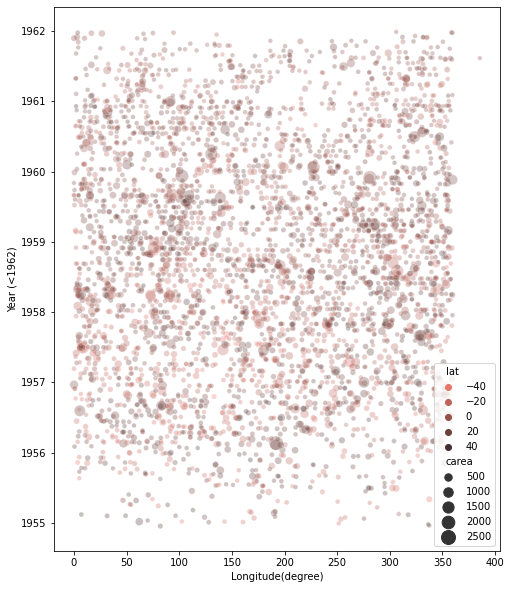

In [ ]:
fig = plt.figure(figsize = (8,10))
p = sns.scatterplot(data=df[df.year < 1962],x = 'lon',y='year',size= 'carea',
                    sizes = (20,200),alpha = .3,  hue = 'lat',palette ='dark:salmon_r')
p.set_xlabel("Longitude(degree)") #x label
p.set_ylabel("Year (<1962)") #y label
# In seaborn, the hue parameter determines which column in the data frame 
# should be used for colour encoding

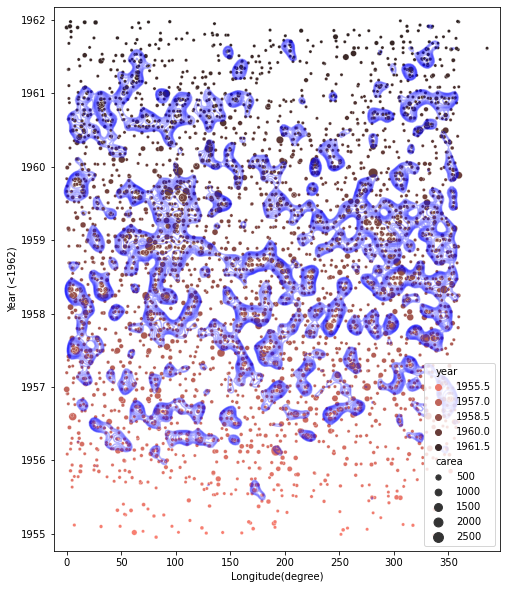

In [ ]:
# bandwidth kısaltınca küçük ölçek topaklanma görülcek
# bw_adjust : Increasing will make the curve smoother.

# threshold = eşik değeri altındakileri noktaları gösterme
fig = plt.figure(figsize = (8,10))
p = sns.scatterplot(data=df[df.year < 1962],x = 'lon',y='year',size= 'carea',
                    sizes = (10,100),color = 'red', hue = 'year',alpha = 1.,
                    palette ='dark:salmon_r')
p.set_xlabel("Longitude(degree)") #x label
p.set_ylabel("Year (<1962)") #y label
sns.kdeplot(data = df[df.year<1962],x = "lon",y ="year",bw_adjust=0.15,alpha = .3,
            thresh = .5,color = 'blue')

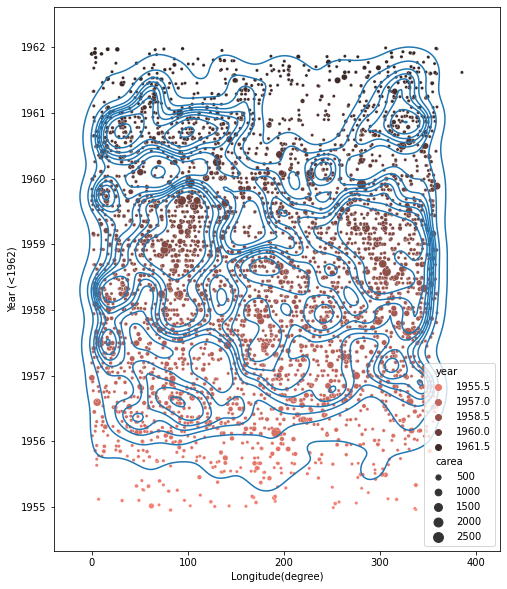

In [ ]:
fig = plt.figure(figsize = (8,10))
p = sns.scatterplot(data=df[df.year < 1962],x = 'lon',y='year',size= 'carea',
                    sizes = (10,100),color = 'red', hue = 'year',alpha = 1.,
                    palette ='dark:salmon_r')
p.set_xlabel("Longitude(degree)") #x label
p.set_ylabel("Year (<1962)") #y label
sns.kdeplot(data = df[df.year<1962],x = "lon",y ="year",bw_adjust=0.5,alpha = 1.) 
# thresh = .5,color = 'blue'

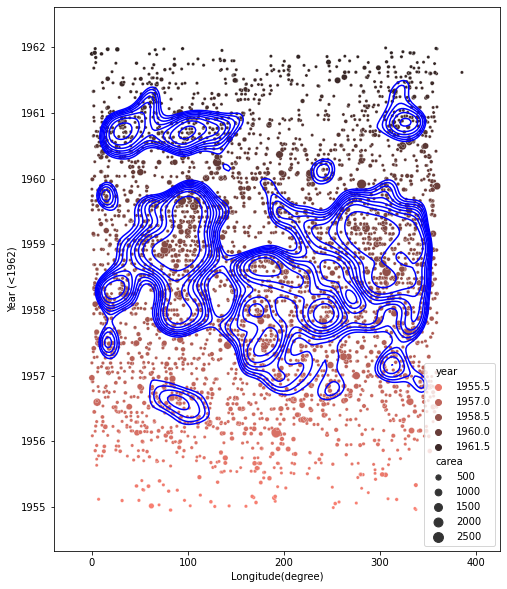

In [ ]:
fig = plt.figure(figsize = (8,10))
p = sns.scatterplot(data=df[df.year < 1962],x = 'lon',y='year',size= 'carea',
                    sizes = (10,100),color = 'red', hue = 'year',alpha = 1.,
                    palette ='dark:salmon_r')
p.set_xlabel("Longitude(degree)") #x label
p.set_ylabel("Year (<1962)") #y label
sns.kdeplot(data = df[df.year<1962],x = "lon",y ="year",bw_adjust=0.5,alpha = 1., thresh = .5,color = 'blue')

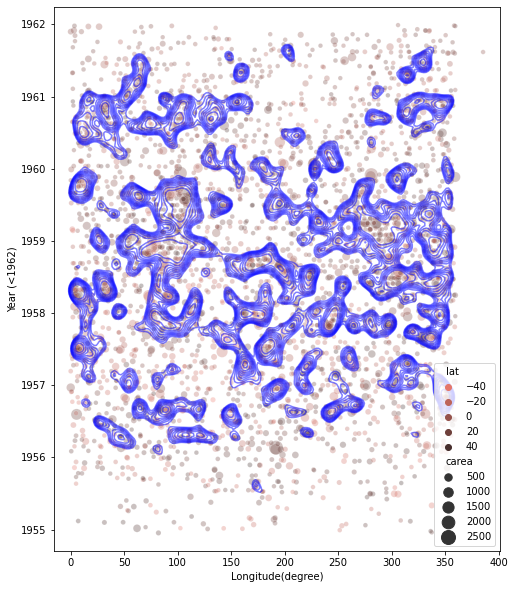

In [ ]:
fig = plt.figure(figsize = (8,10))
p = sns.scatterplot(data=df[df.year < 1962],x = 'lon',y='year',size= 'carea',
                    sizes = (20,200),alpha = .3,  hue = 'lat',palette ='dark:salmon_r')
p.set_xlabel("Longitude(degree)") #x label
p.set_ylabel("Year (<1962)") #y label
sns.kdeplot(data = df[df.year<1962],x = "lon",y ="year",bw_adjust=0.2,alpha = .5,
            thresh = .5,color = 'blue')

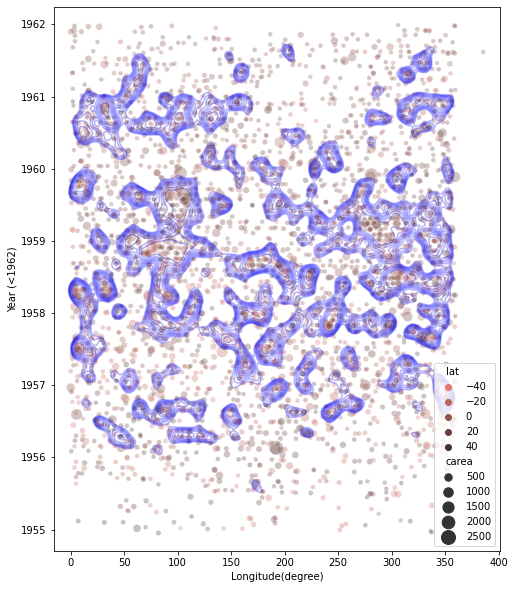

In [ ]:
fig = plt.figure(figsize = (8,10))
p = sns.scatterplot(data=df[df.year < 1962],x = 'lon',y='year',size= 'carea',
                    sizes = (20,200),alpha = .3,  hue = 'lat',palette ='dark:salmon_r')
p.set_xlabel("Longitude(degree)") #x label
p.set_ylabel("Year (<1962)") #y label
sns.kdeplot(data = df[df.year<1962],x = "lon",y ="year",bw_adjust=0.15,alpha = .3,
            thresh = 0.5,color = 'blue')

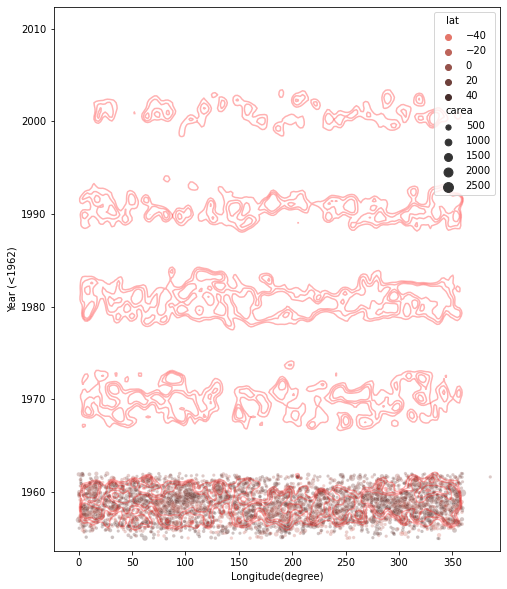

In [ ]:
# levels = Number of contour levels or values to draw contours at. 
fig = plt.figure(figsize = (8,10))
p = sns.scatterplot(data=df[df.year < 1962],x = 'lon',y='year',size= 'carea',
                    sizes = (10,100),alpha = .3,  hue = 'lat',palette ='dark:salmon_r')
p.set_xlabel("Longitude(degree)") #x label
p.set_ylabel("Year (<1962)") #y label
sns.kdeplot(data = df,x = "lon",y ="year",bw_adjust=0.15,alpha = .3,color ='red',
            thresh = 0.5,levels = 4)

In [ ]:
# kdeplot hesaplanırken sorun geometrik hata nerde?